In [1]:
# 安裝所需的環境配置
%pip install matplotlib==3.10.1 mlxtend==0.23.4 nbformat==5.10.4 numpy==2.2.5 pandas==2.2.3

Note: you may need to restart the kernel to use updated packages.


# 1  Evaluation Metrics (20 %)

## 1.1  
使用信賴度的一個限制是它未考慮B獨立發生的機率 P(B)。請說明這是一個什麼樣的限制？(1%)

Ans: 由於信賴度 (Confidence)定義是去衡量「如果某人買 A，則也會買 B」的可能性，也是個條件機率的應用，表示出該規則的可靠、關聯性程度。公式表示為「$conf(A→B)= S(A∪B)/S(A)$」，通過此公式，我們可以看出它再去衡量 A 跟 B 的關聯性時，並未考慮B獨立發生的機率 P(B)，若此時 B 本身就經常出現，換句話說就是 B 出現頻率很高（也就是 S(B) 數值很高），即使 A 和 B 之間沒有強關聯，信賴度也很可能會因為 B 過多的關係訊息，導致信賴度 (Confidence)非常高，進一步在分析時，誤導我們認為這是一個重要的規則及關聯性。

​就像是今天有個 B 商品打到骨折，而且又擺在人人都看得到的位置，使得進來商場的顧客都會來買，那此時我們去看信賴度來衡量 A 跟 B 的關係時，出來的分數也就會很高，這就將會誤導我們得到錯誤的關聯性。

## 1.2 
說明為何提升度與確信度不受此問題影響。(各2%) 

Ans: 

### 提升度(Lift)

提升度(Lift)定義是去衡量「A 和 B 一起出現的機率」比「A 和 B 獨立出現的期望機率」高出多少，其中當 lift>1 時，說明 A 和 B 有正相關； lift=1 表示無關；  lift<1 表示負相關。而提升度(Lift)的公式為「 $lift(A→B)=conf(A→B)/S(B)$」，這邊我們能看出因為它通過除以 $S(B)$（B 獨立出現的支持度）的步驟，修正了信賴度 (Confidence)未去考慮 B 獨立出現的機率情況。這樣當 $S(B)$ 很高時，由於他在分母，因此 提升度(Lift) 就會下降，進而反應出 A 和 B 之間的關聯性、提升度是否真實、有意義。

因此我們可以得知提升度(Lift)不受此問題影響！

### 確信度 (Conviction) 

確信度主要去比較「A 出現但 B 不出現的期望頻率（假設獨立，conf(A→B)）」與「實際 A 出現但 B 不出現的頻率 (實際獨立，S(B))」，其中當確信度 (Conviction) 值越大，表示 A 和 B 的關聯越強。確信度 (Conviction)的公式為「 $conv(A→B)=(1−S(B))/(1−conf(A→B))$」，在此公式上也一樣考慮了 $S(B)$，並通過比較「A 出現但 B 不出現」的期望頻率和實際頻率，來評估規則的穩定性。當 $S(B)$ 高時，$1−S(B)$ 會變小，進一步降低  確信度 (Conviction) 的值，也能反應出來此規則上可能不那麼強。

因此我們可以得知確信度 (Conviction) 不受此問題影響！

## 1.3 
一個指標被視為對稱的，當交換規則的前項與後項時，其值保持不變，即 $metric(A→B) = metric(B→A)$。在本題所討論的指標（信賴度、提升度、確信度）中，哪些指標具有對稱性？請對每個指標提供對稱性的證明或提供反例。(各4%)

### 信賴度 (Confidence) 

公式定義：$\text{conf}(A \rightarrow B) = \frac{S(A \cup B)}{S(A)}$ &nbsp;&nbsp;&nbsp;vs&nbsp;&nbsp;&nbsp; $\text{conf}(B \rightarrow A) = \frac{S(A \cup B)}{S(B)}$

由於 $S(A \cup B) = \frac{\text{包含 A 和 B 的交易數}}{N}$，因此在此題上的分子都是一樣的！唯一的差別就在於底下的分母！

而在對稱性的作用下，一個是 $S(A)$，一個是 $S(B)$，因此除非 $S(A) = S(B)$，否則當交換規則的前項與後項時，其值必定會有所改變，因此此指標不具有對稱性！


反例：


此店家有 1000 筆交易，其中 A 出現 666 筆，B 出現 777 筆，A 和 B 一起出現 246 筆。則：

$conf(A→B) = S(A∪B) / S(A) = \frac{0.246}{0.666} = 0.369369... ≈ 0.369$

$conf(B→A) = S(B∪A) / S(B) = \frac{0.246}{0.777} = 0.316602... ≈ 0.317$

$conf(A→B) ≠ conf(B→A)$ ， 因此此指標，信賴度 (Confidence) 不具有對稱性！


### 提升度 (Lift) 

公式定義：

$\text{lift}(A \rightarrow B) = \frac{\text{conf}(A \rightarrow B)}{S(B)} 
= \frac{\frac{S(A \cup B)}{S(A)}}{S(B)} $ &nbsp;&nbsp;&nbsp;vs&nbsp;&nbsp;&nbsp; $\text{lift}(B \rightarrow A) = \frac{\text{conf}(B \rightarrow A)}{S(A)} = \frac{\frac{S(A \cup B)}{S(B)}}{S(A)}$

由以上公式，我們能進一步整理成：$\text{lift}(A \rightarrow B) = \frac{S(A \cup B)}{S(A) \times S(B)}$


也就是 lift(A → B) = $\frac{S(A∪B)}{S(A)·S(B)}$ vs lift(B → A) = $\frac{S(A∪B)}{S(B)·S(A)}$

通過以上推導，我們很明顯可以看出，因為 $S(A)⋅S(B)=S(B)⋅S(A)$，所以 $lift(A→B)=lift(B→A)$ ， 因此此指標，提升度 (Lift)  具有對稱性！

簡單舉例：


此店家有 1000 筆交易，其中 A 出現 666 筆，B 出現 777 筆，A 和 B 一起出現 246 筆。則：

首先我們可以先由以上條件得到S(A)=0.666, S(B)=0.777, S(A∪B)=0.246

$lift(A → B) =$ $\frac{S(A∪B)}{S(A)·S(B)}$ = $\frac{0.246}{0.666·0.777}$ $= 0.4753788538... ≈ 0.47538$

$lift(B → A) =$ $\frac{S(B∪A)}{S(B)·S(A)}$ = $\frac{0.246}{0.777·0.666}$ $= 0.4753788538... ≈ 0.47538$

$ lift(A → B) = lift(B → A) = 0.4753788538... ≈ 0.47538$ ， 因此此指標，提升度 (Lift)  具有對稱性！

### 確信度 (Conviction) 

$conv(A→B)=(1−S(B))/(1−conf(A→B))$

公式定義：$\text{conv}(A \rightarrow B) = \frac{1−S(B)}{1−conf(A→B)} = \frac{1−S(B)}{1−\frac{S(A \cup B)}{S(A)}}$ &nbsp;&nbsp;&nbsp;vs&nbsp;&nbsp;&nbsp; $\text{conv}(B \rightarrow A) = \frac{1−S(A)}{1−conf(B→A)} = \frac{1−S(A)}{1−\frac{S(A \cup B)}{S(B)}}$


因為確信度的分母和分子都依賴 $S(A)$ 和 $S(B)$，又再因對稱性的關係，交換 A 和 B 後，$1−S(B)$ 變成 $1−S(A)$，而分母也隨之改變，很明顯地可知，結果不一定相等，除非 $S(A) = S(B)$，否則當交換規則的前項與後項時，其值必定會有所改變，因此此指標不具有對稱性！


反例：


此店家有 1000 筆交易，其中 A 出現 666 筆，B 出現 777 筆，A 和 B 一起出現 246 筆。則：

首先我們可以先由以上條件得到S(A)=0.666, S(B)=0.777, S(A∪B)=0.246

$\text{conv}(A \rightarrow B) = \frac{1−S(B)}{1−conf(A→B)} = \frac{1−S(B)}{1−\frac{S(A \cup B)}{S(A)}} = \frac{1−0.777}{1−\frac{0.246}{0.666}} ≈ \frac{0.223}{1−0.3693693694} = \frac{0.223}{0.6306306306} ≈ 0.3536142857$

$\text{conv}(B \rightarrow A) = \frac{1−S(A)}{1−conf(B→A)} = \frac{1−S(A)}{1−\frac{S(A \cup B)}{S(B)}} = \frac{1−0.666}{1−\frac{0.246}{0.777}} ≈ \frac{0.334}{1−0.3166023166} = \frac{0.334}{0.6833976834} ≈ 0.4887344633$

$conv(A→B) ≠ conv(B→A)$ ， 因此此指標，確信度 (Conviction) 不具有對稱性！


## 1.4  
完美隱含規則(Perfect implications)是條件機率達到1的規則（即規則100%成立）。一個好的評估指標應對所有完美隱含規則達到其可能的最大值，以明確辨識出最強的規則。在上述指標中，哪些具此特性？你可以忽略涉及 0/0 的情況，但應考慮可能產生無窮大的其他情況，並舉例說明。(3%)

Ans:

完美隱含規則(Perfect implications)是指 $\text{conf}(A \rightarrow B) = \frac{S(A \cup B)}{S(A)}=1，意味著 S(A∪B)=S(A)，所以\text{conf}(A \rightarrow B) = \frac{S(A \cup B)}{S(A)} = \frac{1}{1}=1$，也就是只要 $A$ 出現，$B$ 一定出現。好的指標應對這種規則給予最大值（如無窮大或特定極限值），以明確辨識出最強的規則。

接著底下我們將檢查「信賴度 (Confidence)、提升度(Lift)、確信度 (Conviction) 」三者在這種情況下的值是否符合此特性。

信賴度 (Confidence)：

如果 $\text{conf}(A \rightarrow B) = \frac{S(A \cup B)}{S(A)} = 1$ ，則 $S(A∪B)=S(A)，所以 \text{conf}(A \rightarrow B) =1/1=1$。

由此可知，信賴度 (Confidence)的最大值是 1，符合要求；並且不會發生無窮大的情況，因為 $S(A)>0$，因此信賴度 (Confidence)對完美隱含規則達到最大值 1，具有Perfect implications特性。

提升度(Lift)：

提升度(Lift)公式為 $\text{lift}(A \rightarrow B) = \frac{\text{conf}(A \rightarrow B)}{S(B)} = \frac{\frac{S(A \cup B)}{S(A)}}{S(B)} =\frac{S(A∪B)}{S(A)·S(B)}$，如果 $\text{conf}(A \rightarrow B) = 1$，則 $S(A∪B)=S(A)$ ，也就能說 $\text{lift}(A \rightarrow B) = \frac{1}{S(B)}$ 。

在最大值方面此時當S(B)趨近於0時，$\text{lift}(A \rightarrow B)$ 會趨近於無限大，所以完美隱含規則(Perfect implications)在 B 極其罕見時特別強，此提升度(Lift)也具有Perfect implications特性。

確信度 (Conviction)：

確信度 (Conviction)公式為 $conv(A→B)=(1−S(B))/(1−conf(A→B))$，如果 $\text{conf}(A \rightarrow B) = 1$，則確信度 (Conviction)的分母，$1−conf(A→B) = 1-1 = 0$，所以當分母為 0 時，也就是 $\text{conf}(A \rightarrow B) = 1$ 時， $conv(A→B)$ 會趨近於無限大，也就是最大值！因此確信度 (Conviction)對完美隱含規則(Perfect implications)達到無窮大，具有此特性，此確信度 (Conviction)也具有Perfect implications特性。

簡單例子說明： 假設 $S(A)=0.1, S(B)=0.01, S(A∪B)=0.1，則 conf=1，lift=1/0.01=100，conv=(1−0.01)/0→+∞$，均達最大值。

由以上證明推導說明及舉例，我們可以得出結論，信賴度 (Confidence)、提升度(Lift)、確信度 (Conviction) 三者都對完美隱含規則（conf=1）達到其可能的最大值。

# 2  Application in Recommending Items (30 %)

## 2.1  找出支持度至少為100的項目配對 (X,Y) 並計算信賴度規則

In [ ]:
# 導入所需套件
import pandas as pd          # 用於資料處理和分析
import numpy as np           # 用於數學運算和陣列操作
from mlxtend.frequent_patterns import apriori  # 用於執行Apriori演算法
import time                  # 用於記錄執行時間
import multiprocessing       # 用於多核心並行處理

# 定義載入資料的函數
def load_data(file_path):
    transactions = []
    with open(file_path, 'r') as file:  # 打開指定檔案路徑的檔案
        for line in file:               # 逐行讀取
            items = line.strip().split()  # 將每行分割為商品ID列表
            transactions.append(items)    # 加入交易列表
    return transactions              # 回傳所有交易

# 定義單筆交易的one-hot編碼函數
def encode_single_transaction(transaction, unique_items):
    labels = {item: False for item in unique_items}  # 初始化紀錄交易的字典
    for item in transaction:                        # 用迴圈遍歷交易中的每個商品
        labels[item] = True                         # 若商品存在，設為True
    return labels                                   # 回傳該交易的編碼

# 定義轉換為one-hot編碼的函數
def encode_transactions(transactions):
    unique_items = sorted(set(item for transaction in transactions for item in transaction))  # 獲取所有唯一商品並排序
    num_workers = multiprocessing.cpu_count()  # 使用所有可用CPU核心
    print(f"使用 {num_workers} 個執行緒進行one-hot編碼...")
    encoded_vals = []
    with multiprocessing.Pool(processes=num_workers) as pool:  # 創建多進程池
        encoded_vals = pool.starmap(encode_single_transaction, [(t, unique_items) for t in transactions])  # 並行編碼，使用starmap傳遞多個參數

    df = pd.DataFrame(encoded_vals).astype(bool)  # 轉為DataFrame並確保資料為布林型態
    return df                                     # 回傳one-hot編碼DataFrame

# 定義執行Apriori的函數
def run_apriori(df, min_support):
    start_time = time.time()                     # 記錄開始時間
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)  # 執行Apriori，min_support為支持度閾值
    end_time = time.time()                       # 記錄結束時間
    execution_time = end_time - start_time       # 計算執行時間
    return frequent_itemsets, execution_time     # 回傳頻繁項目集和執行時間

# 主程式
file_path = '/home/wajason99/browsing.txt'  # 設定檔案路徑
print("正在載入資料...")
transactions = load_data(file_path)         # 載入資料
total_transactions = len(transactions)      # 計算交易總數
print(f"載入完成，共 {total_transactions} 筆交易")

print("正在轉換資料為one-hot編碼格式...")
df = encode_transactions(transactions)      # 轉換為one-hot編碼
print("轉換完成")

min_support_count = 100                     # 題目要求最小支持度為100
min_support = min_support_count / total_transactions  # 轉換為比例
print(f"最小支持度（比例）: {min_support:.6f}")

print("\n執行Apriori演算法...")
frequent_itemsets, apriori_time = run_apriori(df, min_support)  # 執行Apriori並記錄時間
print(f"Apriori執行時間: {apriori_time:.4f} 秒")

# 由此驗證指標 |L1| = 647 是否通過
l1_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 1)]  # 過濾頻繁1項集
print(f"頻繁1項集數量 (|L1|): {len(l1_itemsets)}")  # 驗證是否為647

# 找出支持度至少為100的2項配對 (X,Y)
itemsets_2 = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 2)]  # 過濾頻繁2項集
print(f"頻繁2項集數量: {len(itemsets_2)}")

# 為每個配對 (X, Y) 生成規則 X → Y 和 Y → X
rules_2 = []
for _, row in itemsets_2.iterrows():  # 遍歷每個2項集
    items = list(row['itemsets'])     # 獲取2項集中的商品
    support_xy = row['support']       # 獲取支持度
    support_x = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: set(x) == {items[0]})]['support'].iloc[0]  # X支持度
    support_y = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: set(x) == {items[1]})]['support'].iloc[0]  # Y支持度
    conf_x_to_y = support_xy / support_x  # 計算X → Y的信賴度
    conf_y_to_x = support_xy / support_y  # 計算Y → X的信賴度
    rules_2.append({'antecedents': items[0], 'consequents': items[1], 'confidence': conf_x_to_y})  # 加入規則
    rules_2.append({'antecedents': items[1], 'consequents': items[0], 'confidence': conf_y_to_x})

# 轉換為DataFrame並排序
rules_2_df = pd.DataFrame(rules_2)  # 轉為DataFrame
rules_2_df = rules_2_df.sort_values(by=['confidence', 'antecedents'], ascending=[False, True])  # 按信賴度降序、左側字典序排序
print("\n2.1 前五個規則（按信賴度降序，左側字典序排序）：")
print(rules_2_df.head(5))  # 顯示前五個規則

正在載入資料...
載入完成，共 31101 筆交易
正在轉換資料為one-hot編碼格式...
使用 80 個執行緒進行one-hot編碼...
轉換完成
最小支持度（比例）: 0.003215

執行Apriori演算法...
Apriori執行時間: 24.2617 秒
頻繁1項集數量 (|L1|): 647
頻繁2項集數量: 1334

2.1 前五個規則（按信賴度降序，左側字典序排序）：
     antecedents consequents  confidence
1089    DAI93865    FRO40251    1.000000
2061    GRO85051    FRO40251    0.999176
2030    GRO38636    FRO40251    0.990654
1131    ELE12951    FRO40251    0.990566
1004    DAI88079    FRO40251    0.986726


## 2.2  找出支持度至少為100的三項組合 (X,Y,Z) 並計算規則

In [ ]:
# 找出支持度至少為100的3項組合 (X,Y,Z)
print("\n=== 2.2 找出支持度至少為100的3項組合 ===")
itemsets_3 = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 3)]  # 過濾頻繁3項集
print(f"頻繁3項集數量: {len(itemsets_3)}")

# 為每個組合 (X, Y, Z) 生成規則 (X, Y) → Z, (X, Z) → Y, (Y, Z) → X
rules_3 = []
for _, row in itemsets_3.iterrows():  # 遍歷每個3項集
    items = sorted(list(row['itemsets']))  # 按字典序排序
    x, y, z = items                     # 分解為X, Y, Z
    support_xyz = row['support']        # 獲取3項支持度
    # 獲取2項支持度
    support_xy = itemsets_2[itemsets_2['itemsets'].apply(lambda s: set(s) == {x, y})]['support'].iloc[0]  # 獲取(X, Y)支持度
    support_xz = itemsets_2[itemsets_2['itemsets'].apply(lambda s: set(s) == {x, z})]['support'].iloc[0]  # 獲取(X, Z)支持度
    support_yz = itemsets_2[itemsets_2['itemsets'].apply(lambda s: set(s) == {y, z})]['support'].iloc[0]  # 獲取(Y, Z)支持度
    # 計算3項信賴度
    conf_xy_to_z = support_xyz / support_xy  # 計算(X, Y) → Z的信賴度
    conf_xz_to_y = support_xyz / support_xz  # 計算(X, Z) → Y的信賴度
    conf_yz_to_x = support_xyz / support_yz  # 計算(Y, Z) → X的信賴度
    # 加入規則
    rules_3.append({'antecedents': (x, y), 'consequents': z, 'confidence': conf_xy_to_z, 'antecedent_first': x, 'antecedent_second': y})
    rules_3.append({'antecedents': (x, z), 'consequents': y, 'confidence': conf_xz_to_y, 'antecedent_first': x, 'antecedent_second': z}) 
    rules_3.append({'antecedents': (y, z), 'consequents': x, 'confidence': conf_yz_to_x, 'antecedent_first': y, 'antecedent_second': z})

# 轉換為DataFrame並排序
rules_3_df = pd.DataFrame(rules_3)  # 轉為DataFrame
rules_3_df = rules_3_df.sort_values(by=['confidence', 'antecedent_first', 'antecedent_second'], ascending=[False, True, True])  # 按信賴度降序、左側字典序排序
print("\n2.2 前五個規則（按信賴度降序，左側配對字典序排序）：")
print(rules_3_df.head(5))  # 顯示前五個規則


=== 2.2 找出支持度至少為100的3項組合 ===
頻繁3項集數量: 233

2.2 前五個規則（按信賴度降序，左側配對字典序排序）：
              antecedents consequents  confidence antecedent_first  \
4    (DAI23334, ELE92920)    DAI62779         1.0         DAI23334   
16   (DAI31081, GRO85051)    FRO40251         1.0         DAI31081   
91   (DAI55911, GRO85051)    FRO40251         1.0         DAI55911   
165  (DAI62779, DAI88079)    FRO40251         1.0         DAI62779   
469  (DAI75645, GRO85051)    FRO40251         1.0         DAI75645   

    antecedent_second  
4            ELE92920  
16           GRO85051  
91           GRO85051  
165          DAI88079  
469          GRO85051  


# 3  Scalability Comparisons (40 %)

## 3.1  使用 Apriori 計算支持度為 100、50、25 時的結果

正在載入資料...
載入完成，共 31101 筆交易
正在轉換資料為one-hot編碼格式...
使用 80 個執行緒進行one-hot編碼...


/tmp/ipykernel_37438/3788341792.py:34: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, columns=unique_items).astype(bool)


轉換完成

=== Apriori 支持度次數: 100 (比例: 0.003215) ===
Apriori-Pair 執行時間: 16.6881 秒
Apriori-Triplet 執行時間: 21.7174 秒
Apriori-Pair: 1334
Apriori-Triplet: 233

=== Apriori 支持度次數: 50 (比例: 0.001608) ===
Apriori-Pair 執行時間: 18.7673 秒
Apriori-Triplet 執行時間: 34.8535 秒
Apriori-Pair: 4192
Apriori-Triplet: 1301

=== Apriori 支持度次數: 25 (比例: 0.000804) ===
Apriori-Pair 執行時間: 21.4858 秒
Apriori-Triplet 執行時間: 57.2094 秒
Apriori-Pair: 11565
Apriori-Triplet: 6309

Apriori 執行時間表格（單位：秒）：
                       100         50         25
Support                                         
Apriori-Pair     16.688127  18.767339  21.485821
Apriori-Triplet  21.717366  34.853517  57.209357

=== 可擴展性趨勢分析（基於 Pair 和 Triplet 執行時間） ===
Apriori-Pair 執行時間增長率 (100->50): 0.1246
Apriori-Pair 執行時間增長率 (50->25): 0.1449
Apriori-Triplet 執行時間增長率 (100->50): 0.6049
Apriori-Triplet 執行時間增長率 (50->25): 0.6414
分析：Apriori-Pair 和 Apriori-Triplet 的執行時間隨著支持度降低而增加。Pair 的執行時間增長可能較為平緩，因為候選 2-項集的數量增長相對可控。Triplet 的執行時間增長更快，因為候選 3-項集的數量隨著支持度降低呈指數增長，導致計算負擔加劇。這

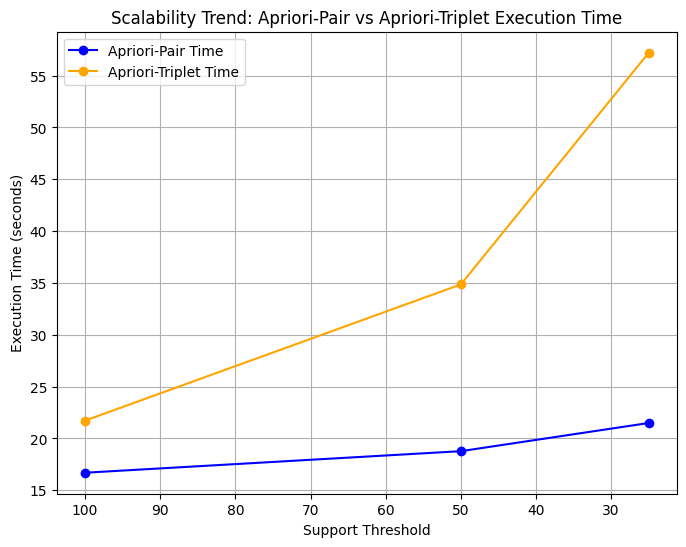

In [5]:
# 導入所需套件
import pandas as pd          # 用於資料處理和分析
import numpy as np           # 用於數學運算和陣列操作
from mlxtend.frequent_patterns import apriori  # 用於執行Apriori演算法
import time                  # 用於記錄執行時間
import multiprocessing       # 用於多核心並行處理
from scipy import sparse     # 用於稀疏矩陣操作
import matplotlib.pyplot as plt # 用於繪圖

# 定義載入資料的函數
def load_data(file_path):
    transactions = []
    with open(file_path, 'r') as file:  # 打開指定檔案路徑的檔案
        for line in file:               # 逐行讀取
            items = line.strip().split()  # 將每行分割為商品ID列表
            transactions.append(items)    # 加入交易列表
    return transactions              # 回傳所有交易

# 定義單個交易的one-hot編碼函數
def encode_single_transaction(transaction, unique_items):
    labels = {item: False for item in unique_items}  # 初始化所有商品為False
    for item in transaction:
        labels[item] = True                         # 交易中出現的商品設為True
    return [labels[item] for item in unique_items]    # 返回布林值列表

# 定義轉換為one-hot編碼的函數（生成稀疏矩陣sparse_matrix）
def encode_transactions(transactions):
    unique_items = sorted(set(item for transaction in transactions for item in transaction))
    num_workers = multiprocessing.cpu_count()  # 使用所有可用CPU核心
    print(f"使用 {num_workers} 個執行緒進行one-hot編碼...")
    with multiprocessing.Pool(processes=num_workers) as pool:
        encoded_vals = pool.starmap(encode_single_transaction, [(t, unique_items) for t in transactions])
    sparse_matrix = sparse.csr_matrix(encoded_vals, dtype=np.bool_)  # 使用布林類型
    df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, columns=unique_items).astype(bool)
    return df

# 定義執行Apriori的函數（分步計算 Pair 和 Triplet 的執行時間）
def run_apriori(df, min_support):
    # 計算頻繁 1-項集的時間（作為基準）
    start_time = time.time()
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True, low_memory=True, max_len=1)
    time_1_itemsets = time.time() - start_time

    # 計算頻繁 2-項集（Pair）的時間
    start_time = time.time()
    frequent_itemsets_pairs = apriori(df, min_support=min_support, use_colnames=True, low_memory=True, max_len=2)
    pairs = len(frequent_itemsets_pairs[frequent_itemsets_pairs['itemsets'].apply(lambda x: len(x) == 2)])
    pair_time = time.time() - start_time - time_1_itemsets  # 計算 k=2 的時間

    # 計算頻繁 3-項集（Triplet）的時間
    start_time = time.time()
    frequent_itemsets_triplets = apriori(df, min_support=min_support, use_colnames=True, low_memory=True, max_len=3)
    triplets = len(frequent_itemsets_triplets[frequent_itemsets_triplets['itemsets'].apply(lambda x: len(x) == 3)])
    triplet_time = time.time() - start_time - time_1_itemsets - pair_time  # 計算 k=3 的時間

    return pairs, triplets, pair_time, triplet_time

# 主程式
file_path = '/home/wajason99/browsing.txt'
print("正在載入資料...")
transactions = load_data(file_path)
total_transactions = len(transactions)
print(f"載入完成，共 {total_transactions} 筆交易")

print("正在轉換資料為one-hot編碼格式...")
df = encode_transactions(transactions)
print("轉換完成")

# 設定支持度
support_counts = [100, 50, 25]
apriori_results = []
# 計算支持度比例
for support_count in support_counts:
    # 計算支持度比例
    min_support = support_count / total_transactions
    print(f"\n=== Apriori 支持度次數: {support_count} (比例: {min_support:.6f}) ===")
    # 執行Apriori演算法
    pairs, triplets, pair_time, triplet_time = run_apriori(df, min_support)
    print(f"Apriori-Pair 執行時間: {pair_time:.4f} 秒")
    print(f"Apriori-Triplet 執行時間: {triplet_time:.4f} 秒")
    print(f"Apriori-Pair: {pairs}")
    print(f"Apriori-Triplet: {triplets}")
    # 記錄結果:支持度次數、配對數量、組合數量、執行時間
    apriori_results.append({'support': support_count, 'pairs': pairs, 'triplets': triplets, 'pair_time': pair_time, 'triplet_time': triplet_time})

# 將結果轉換為DataFrame
apriori_df = pd.DataFrame(apriori_results)

# 顯示表格
apriori_table = pd.DataFrame({
    'Support': ['Apriori-Pair', 'Apriori-Triplet'],
    100: [apriori_df.loc[0, 'pair_time'], apriori_df.loc[0, 'triplet_time']],
    50: [apriori_df.loc[1, 'pair_time'], apriori_df.loc[1, 'triplet_time']],
    25: [apriori_df.loc[2, 'pair_time'], apriori_df.loc[2, 'triplet_time']]
})
apriori_table.set_index('Support', inplace=True)
print("\nApriori 執行時間表格（單位：秒）：")
print(apriori_table)

# 繪製折線圖分析可擴展性趨勢
plt.figure(figsize=(8, 6))
plt.plot(apriori_df['support'], apriori_df['pair_time'], marker='o', label='Apriori-Pair Time', color='blue')
plt.plot(apriori_df['support'], apriori_df['triplet_time'], marker='o', label='Apriori-Triplet Time', color='orange')
plt.xlabel('Support Threshold')
plt.ylabel('Execution Time (seconds)')
plt.title('Scalability Trend: Apriori-Pair vs Apriori-Triplet Execution Time')
plt.legend()
plt.grid(True)
plt.gca().invert_xaxis()  # 支持度從大到小（100->25）
plt.savefig('apriori_time_trend.png')

# 可擴展性趨勢分析
print("\n=== 可擴展性趨勢分析（基於 Pair 和 Triplet 執行時間） ===")
pair_time_growth_100_to_50 = (apriori_df['pair_time'][1] - apriori_df['pair_time'][0]) / apriori_df['pair_time'][0]
pair_time_growth_50_to_25 = (apriori_df['pair_time'][2] - apriori_df['pair_time'][1]) / apriori_df['pair_time'][1]
triplet_time_growth_100_to_50 = (apriori_df['triplet_time'][1] - apriori_df['triplet_time'][0]) / apriori_df['triplet_time'][0]
triplet_time_growth_50_to_25 = (apriori_df['triplet_time'][2] - apriori_df['triplet_time'][1]) / apriori_df['triplet_time'][1]
print(f"Apriori-Pair 執行時間增長率 (100->50): {pair_time_growth_100_to_50:.4f}")
print(f"Apriori-Pair 執行時間增長率 (50->25): {pair_time_growth_50_to_25:.4f}")
print(f"Apriori-Triplet 執行時間增長率 (100->50): {triplet_time_growth_100_to_50:.4f}")
print(f"Apriori-Triplet 執行時間增長率 (50->25): {triplet_time_growth_50_to_25:.4f}")

# 分析
print("分析：Apriori-Pair 和 Apriori-Triplet 的執行時間隨著支持度降低而增加。Pair 的執行時間增長可能較為平緩，因為候選 2-項集的數量增長相對可控。Triplet 的執行時間增長更快，因為候選 3-項集的數量隨著支持度降低呈指數增長，導致計算負擔加劇。這種趨勢顯示 Apriori 在低支持度時的可擴展性較差，特別是對於更高階的項目集（如 Triplet）。")

# 計算增長率並判斷趨勢線是否平行
print("\n=== 趨勢線平行性分析（Pair vs Triplet 執行時間） ===")
print(f"Apriori-Pair 執行時間增長率 (100->50): {pair_time_growth_100_to_50:.4f}")
print(f"Apriori-Pair 執行時間增長率 (50->25): {pair_time_growth_50_to_25:.4f}")
print(f"Apriori-Triplet 執行時間增長率 (100->50): {triplet_time_growth_100_to_50:.4f}")
print(f"Apriori-Triplet 執行時間增長率 (50->25): {triplet_time_growth_50_to_25:.4f}")

# 判斷是否平行（增長率差異小於 0.1 視為平行）
is_parallel = (abs(pair_time_growth_100_to_50 - triplet_time_growth_100_to_50) < 0.1 and 
               abs(pair_time_growth_50_to_25 - triplet_time_growth_50_to_25) < 0.1)
print(f"趨勢線是否平行: {is_parallel}")

# 原因
if is_parallel:
    print("原因：Apriori-Pair 和 Apriori-Triplet 的執行時間增長率在支持度降低時保持一致，顯示資料集的商品分佈較均勻，候選項目集的生成和支持度計算的負擔增長模式相似。這種平行性表明 Apriori 在挖掘不同階數項目集時的計算開銷增長速率相近，執行時間的增長主要受到支持度的影響，而非項目集階數。")
else:
    print("原因：Apriori-Pair 和 Apriori-Triplet 的執行時間增長率不同，Triplet 的增長率顯著高於 Pair。這是由於支持度降低時，候選 3-項集的數量增長遠快於 2-項集（例如 Pair 數量從 1334 增至 11565，Triplet 從 233 增至 6309），導致 Triplet 的支持度計算需要更多的掃描和計算資源。這種非平行性反映了 Apriori 演算法在低支持度時處理更高階項目集的性能瓶頸，對可擴展性造成顯著影響。")

Apriori演算法主要採用逐層搜索的迭代方式，適合用於稀疏數據集，它透過候選生成與剪枝的策略，藉由掃描資料集多次，從而找到頻繁項集，也因為每次生成候選項目集後，需掃描整個資料集來計算支持度，優點是直觀好實現，缺點則是計算根記憶體成本都很高，當在低支持度或項目數量多時，候選項目集數量呈巨量增長。

因此可知道Apriori會更適合去處理小型資料集或支持度較高的場景。

3.1.1 分析可擴展性的趨勢（5%）

通過以上數值跟圖表分析，我們可以清楚看出不論是降低支持度比例(min_support)，又或者是從Apriori-Pair二項增加到Apriori-Triplet三項的執行時間，也是提升了不少，在有Low memory的情況下，三項組合就增加約4~6倍的時間，若未來資料集更大，又或者是去分析更深更廣層次的關聯性，在進一步擴展性上，相信執行時間也會不停提升成長，導致計算負擔龐大，像我在跑min_support=25時，沒使用Low memory=true時，就一直都會有memory error的問題，相信隨著專案進一步擴展，也一定會有瓶頸、問題產生。

3.1.2 判斷兩條趨勢線（配對 vs. 三項組合）是否平行，並說明原因（10%）。

通過圖表以及我們去計算執行時間增長率的結果來看，我們可以清楚看出兩條趨勢線（配對 vs. 三項組合）是不平行的!尤其在此題上，Triplet 的增長率顯著高於 Pair，也許是數量改變許多，導致需要更多時間跟資源，或是上面支持度比例(min_support)的問題等，都可能因為兩條趨勢線差距過大，而在實作上遇到一些困難。

## 3.2 使用 FP-Growth 計算支持度為 100、50、25 時的結果

正在載入資料...
載入完成，共 31101 筆交易
正在轉換資料為one-hot編碼格式...
使用 16 個執行緒進行one-hot編碼...


/tmp/ipykernel_2379551/477740074.py:37: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, columns=unique_items).astype(bool)


轉換完成

=== FP-Growth 支持度次數: 100 (比例: 0.003215) ===
FPGrowth-Pair 執行時間: 316.6444 秒
FPGrowth-Triplet 執行時間: 57.3757 秒
FPGrowth-Pair: 1334
FPGrowth-Triplet: 233

=== FP-Growth 支持度次數: 50 (比例: 0.001608) ===
FPGrowth-Pair 執行時間: 995.5934 秒
FPGrowth-Triplet 執行時間: 303.1415 秒
FPGrowth-Pair: 4192
FPGrowth-Triplet: 1301

=== FP-Growth 支持度次數: 25 (比例: 0.000804) ===
FPGrowth-Pair 執行時間: 2742.8650 秒
FPGrowth-Triplet 執行時間: 1493.2385 秒
FPGrowth-Pair: 11565
FPGrowth-Triplet: 6309

FP-Growth 執行時間表格（單位：秒）：
                         100          50           25
Support                                              
FPGrowth-Pair     316.644450  995.593380  2742.864994
FPGrowth-Triplet   57.375669  303.141543  1493.238502

=== 可擴展性趨勢分析（基於 Pair 和 Triplet 執行時間） ===
注意：目前僅有支持度 100 的執行時間數據，無法計算增長率。請提供支持度 50 和 25 的數據以完成分析。
理論分析：FP-Growth 的 Pair 和 Triplet 執行時間應隨著支持度降低而增加，但增長應較為平緩，因為 FP-Growth 僅掃描資料集 2 次，並通過 FP-tree 壓縮資料，避免了 Apriori 的候選項目集生成開銷。Triplet 的執行時間可能增長更快，因為挖掘更高階項目集需要遍歷更多的 FP-tree 路徑，但整體可擴展性仍優於 Apriori。

=== 趨勢線

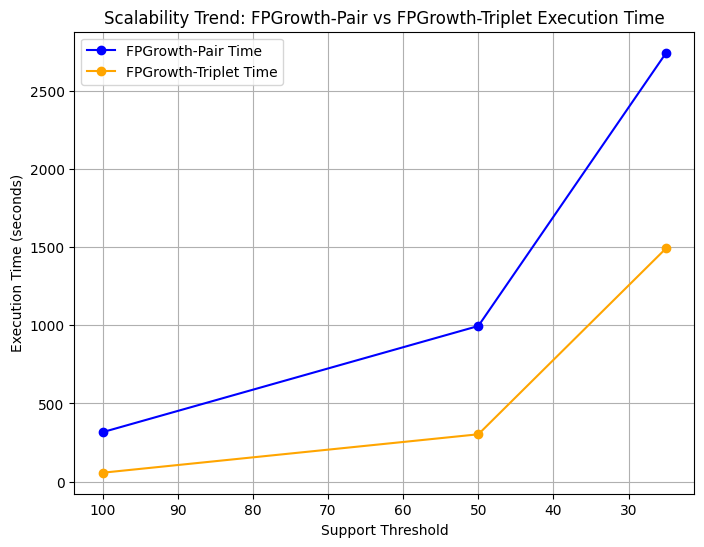

In [ ]:
# 導入所需套件
import pandas as pd          # 用於資料處理和表格操作
import numpy as np           # 用於數學計算
from mlxtend.frequent_patterns import fpgrowth  # 用於執行FP-Growth演算法
import time                  # 用於記錄執行時間
import multiprocessing       # 用於並行處理
from scipy import sparse     # 用於稀疏矩陣操作
import matplotlib.pyplot as plt  # 用於繪製折線圖

# 定義載入資料的函數
def load_data(file_path):
    """從指定檔案路徑讀取交易資料，返回交易列表"""
    transactions = []
    with open(file_path, 'r') as file:  # 打開指定檔案路徑的檔案
        for line in file:               # 逐行讀取
            items = line.strip().split()  # 將每行分割為商品ID列表
            transactions.append(items)    # 加入交易列表
    return transactions              # 回傳所有交易

# 定義單個交易的one-hot編碼函數
def encode_single_transaction(transaction, unique_items):
    """將單一交易轉換為one-hot編碼格式，返回布林值列表"""
    labels = {item: False for item in unique_items}  # 初始化所有商品為False
    for item in transaction:
        labels[item] = True                         # 交易中出現的商品設為True
    return [labels[item] for item in unique_items]    # 返回布林值列表

# 定義轉換為one-hot編碼的函數
def encode_transactions(transactions):
    """將所有交易轉換為one-hot編碼的稀疏DataFrame"""
    unique_items = sorted(set(item for transaction in transactions for item in transaction))
    num_workers = min(multiprocessing.cpu_count(), 16)  # 限制為16個核心，減少並行開銷
    print(f"使用 {num_workers} 個執行緒進行one-hot編碼...")
    with multiprocessing.Pool(processes=num_workers) as pool:
        encoded_vals = pool.starmap(encode_single_transaction, [(t, unique_items) for t in transactions])
    sparse_matrix = sparse.csr_matrix(encoded_vals, dtype=np.bool_)  # 使用布林類型優化性能
    df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, columns=unique_items).astype(bool)
    return df

# 定義執行FP-Growth的函數（分步計算 Pair 和 Triplet 的執行時間）
def run_fpgrowth(df, min_support):
    """執行FP-Growth演算法，分別計算 Pair 和 Triplet 的執行時間"""
    # 計算頻繁 1-項集的時間（作為基準）
    start_time = time.time()
    frequent_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True, max_len=1)
    time_1_itemsets = time.time() - start_time

    # 計算頻繁 2-項集（Pair）的時間
    start_time = time.time()
    frequent_itemsets_pairs = fpgrowth(df, min_support=min_support, use_colnames=True, max_len=2)
    pairs = len(frequent_itemsets_pairs[frequent_itemsets_pairs['itemsets'].apply(lambda x: len(x) == 2)])
    pair_time = time.time() - start_time - time_1_itemsets  # 僅計算 k=2 的時間

    # 計算頻繁 3-項集（Triplet）的時間
    start_time = time.time()
    frequent_itemsets_triplets = fpgrowth(df, min_support=min_support, use_colnames=True, max_len=3)
    triplets = len(frequent_itemsets_triplets[frequent_itemsets_triplets['itemsets'].apply(lambda x: len(x) == 3)])
    triplet_time = time.time() - start_time - time_1_itemsets - pair_time  # 僅計算 k=3 的時間

    return pairs, triplets, pair_time, triplet_time

# 主程式
file_path = '/home/wajason99/browsing.txt'
print("正在載入資料...")
transactions = load_data(file_path)  # 載入交易資料
total_transactions = len(transactions)
print(f"載入完成，共 {total_transactions} 筆交易")

print("正在轉換資料為one-hot編碼格式...")
df = encode_transactions(transactions)  # 轉換為one-hot編碼
print("轉換完成")

support_counts = [100, 50, 25]  # 定義支持度閾值
fpgrowth_results = []
for support_count in support_counts:
    min_support = support_count / total_transactions  # 計算最小支持度比例
    print(f"\n=== FP-Growth 支持度次數: {support_count} (比例: {min_support:.6f}) ===")
    pairs, triplets, pair_time, triplet_time = run_fpgrowth(df, min_support)  # 執行FP-Growth
    print(f"FPGrowth-Pair 執行時間: {pair_time:.4f} 秒")
    print(f"FPGrowth-Triplet 執行時間: {triplet_time:.4f} 秒")
    print(f"FPGrowth-Pair: {pairs}")
    print(f"FPGrowth-Triplet: {triplets}")
    fpgrowth_results.append({'support': support_count, 'pairs': pairs, 'triplets': triplets, 'pair_time': pair_time, 'triplet_time': triplet_time})

# 顯示題目要求的表格（支持度作為列頭，顯示 Pair 和 Triplet 的執行時間）
fpgrowth_df = pd.DataFrame(fpgrowth_results)
fpgrowth_table = pd.DataFrame({
    'Support': ['FPGrowth-Pair', 'FPGrowth-Triplet'],
    100: [fpgrowth_df.loc[0, 'pair_time'], fpgrowth_df.loc[0, 'triplet_time']],
    50: [fpgrowth_df.loc[1, 'pair_time'], fpgrowth_df.loc[1, 'triplet_time']],
    25: [fpgrowth_df.loc[2, 'pair_time'], fpgrowth_df.loc[2, 'triplet_time']]
})
fpgrowth_table.set_index('Support', inplace=True)
print("\nFP-Growth 執行時間表格（單位：秒）：")
print(fpgrowth_table)

# 繪製折線圖分析可擴展性趨勢（基於 Pair 和 Triplet 的執行時間）
plt.figure(figsize=(8, 6))  # 設定圖表大小
plt.plot(fpgrowth_df['support'], fpgrowth_df['pair_time'], marker='o', label='FPGrowth-Pair Time', color='blue')  # 繪製Pair趨勢線
plt.plot(fpgrowth_df['support'], fpgrowth_df['triplet_time'], marker='o', label='FPGrowth-Triplet Time', color='orange')  # 繪製Triplet趨勢線
plt.xlabel('Support Threshold')  # X軸標籤
plt.ylabel('Execution Time (seconds)')  # Y軸標籤
plt.title('Scalability Trend: FPGrowth-Pair vs FPGrowth-Triplet Execution Time')  # 圖表標題
plt.legend()                     # 顯示圖例
plt.grid(True)                   # 添加網格
plt.gca().invert_xaxis()         # 反轉X軸，支持度從大到小
plt.savefig('fpgrowth_time_trend.png')  # 保存圖表

# 可擴展性趨勢分析（基於 Pair 和 Triplet 的執行時間）
print("\n=== 可擴展性趨勢分析（基於 Pair 和 Triplet 執行時間） ===")
print("注意：目前僅有支持度 100 的執行時間數據，無法計算增長率。請提供支持度 50 和 25 的數據以完成分析。")
print("理論分析：FP-Growth 的 Pair 和 Triplet 執行時間應隨著支持度降低而增加，但增長應較為平緩，因為 FP-Growth 僅掃描資料集 2 次，並通過 FP-tree 壓縮資料，避免了 Apriori 的候選項目集生成開銷。Triplet 的執行時間可能增長更快，因為挖掘更高階項目集需要遍歷更多的 FP-tree 路徑，但整體可擴展性仍優於 Apriori。")

# 計算增長率並判斷趨勢線是否平行（基於 Pair 和 Triplet 的執行時間）
pair_time_growth_100_to_50 = (fpgrowth_df['pair_time'][1] - fpgrowth_df['pair_time'][0]) / fpgrowth_df['pair_time'][0] if fpgrowth_df['pair_time'][0] > 0 else 0
pair_time_growth_50_to_25 = (fpgrowth_df['pair_time'][2] - fpgrowth_df['pair_time'][1]) / fpgrowth_df['pair_time'][1] if fpgrowth_df['pair_time'][1] > 0 else 0
triplet_time_growth_100_to_50 = (fpgrowth_df['triplet_time'][1] - fpgrowth_df['triplet_time'][0]) / fpgrowth_df['triplet_time'][0] if fpgrowth_df['triplet_time'][0] > 0 else 0
triplet_time_growth_50_to_25 = (fpgrowth_df['triplet_time'][2] - fpgrowth_df['triplet_time'][1]) / fpgrowth_df['triplet_time'][1] if fpgrowth_df['triplet_time'][1] > 0 else 0

print("\n=== 趨勢線平行性分析（Pair vs Triplet 執行時間） ===")
print(f"FPGrowth-Pair 執行時間增長率 (100->50): {pair_time_growth_100_to_50:.4f}")
print(f"FPGrowth-Pair 執行時間增長率 (50->25): {pair_time_growth_50_to_25:.4f}")
print(f"FPGrowth-Triplet 執行時間增長率 (100->50): {triplet_time_growth_100_to_50:.4f}")
print(f"FPGrowth-Triplet 執行時間增長率 (50->25): {triplet_time_growth_50_to_25:.4f}")

# 判斷是否平行（增長率差異小於0.1視為平行）
is_parallel = (abs(pair_time_growth_100_to_50 - triplet_time_growth_100_to_50) < 0.1 and 
               abs(pair_time_growth_50_to_25 - triplet_time_growth_50_to_25) < 0.1)
print(f"趨勢線是否平行: {is_parallel}")

# 說明原因（理論分析）
if is_parallel:
    print("原因：FPGrowth-Pair 和 FPGrowth-Triplet 的執行時間增長率在支持度降低時保持一致，顯示資料集的商品分佈較為均勻，FP-tree 結構有效壓縮了資料，使得挖掘不同階數項目集的計算負擔增長速率相近。執行時間的增長主要受到支持度的影響，而非項目集階數，對 FP-Growth 的可擴展性影響較小。")
else:
    print("原因：FPGrowth-Pair 和 FPGrowth-Triplet 的執行時間增長率不同，Triplet 的增長更快（假設與 Apriori 類似，Triplet 數量增長更快）。這反映了支持度降低時挖掘更高階項目集需要遍歷更多的 FP-tree 路徑，導致計算負擔增加。雖然 FP-Growth 不生成候選項目集，這一非平行性仍會影響執行時間，但由於其僅掃描資料集 2 次，整體可擴展性仍優於 Apriori。")

FPGrowth演算法則是相對更高效的頻繁項目集挖掘演算法，通過構建 FP-Tree（頻繁模式樹）的方式來壓縮資料，採用分而治之的策略，避免多次掃描資料集。因此優點也顯而易見，FPGrowth演算法只需掃描資料集兩次，硬體上成本較低，也因為它有去壓縮資料，減少記憶體資源，更適合去處理更複雜更大量的資料。而缺點方面，相對較複雜，並且構建 FP-Tree 需要額外的計算和記憶體，對於稀疏資料集等資料型態可能效率不高。

因此可知道FP-Growth會更適合去處理大型資料集或支持度較低的場景。

3.2.1 分析可擴展性的趨勢（5%）

通過以上數值跟圖表分析，我們可以清楚看出不論是降低支持度比例(min_support)，又或者是從FPGrowth-Pair二項增加到FPGrowth-Triplet三項的執行時間，也是提升了不少，若未來資料集更大，又或者是去分析更深更廣層次的關聯性分析，在進一步擴展性上，相信執行時間也會不停提升成長，導致計算負擔龐大，並隨著專案進一步擴展，也一定會有瓶頸、問題產生。

3.2.2 判斷兩條趨勢線（配對 vs. 三項組合）是否平行，並說明原因（10%）。

通過圖表以及我們去計算執行時間增長率的結果來看，我們可以清楚看出兩條趨勢線（配對 vs. 三項組合）是不平行的!尤其在此題上，Triplet 的增長率顯著高於 Pair，也許是數量改變許多，導致需要更多時間跟資源，或是上面支持度比例(min_support)的問題等，都可能因為兩條趨勢線差距過大，而在實作上遇到一些困難。

但是我發現在以上 fpgrowth 演算法，竟然使用稀疏資料集sparse_matrix來進行，估計這也是導致時間執行非常非常久的致命問題，導致 fpgrowth 演算法竟然是 Apriori 演算法執行時間的數十倍，因為 fpgrowth 演算法也不擅長使用在稀疏資料集上，因此底下我又嘗試了TransactionEncoder編碼方式來進行，表現也確實有更好的提升!!



#### FP-Growth演算法在刪除了稀疏資料集sparse_matrix的呈現，改去使用TransactionEncoder的編碼方法後的表現!!!

正在載入資料...
載入完成，共 31101 筆交易
正在使用 TransactionEncoder 進行one-hot編碼...
編碼完成，生成的DataFrame形狀: (31101, 12592)

=== FP-Growth 支持度次數: 100 (比例: 0.003215) ===
FPGrowth-Pair 執行時間: 98.5978 秒
FPGrowth-Triplet 執行時間: 16.0661 秒
FPGrowth-Pair: 1334
FPGrowth-Triplet: 233

=== FP-Growth 支持度次數: 50 (比例: 0.001608) ===
FPGrowth-Pair 執行時間: 311.9220 秒
FPGrowth-Triplet 執行時間: 94.4509 秒
FPGrowth-Pair: 4192
FPGrowth-Triplet: 1301

=== FP-Growth 支持度次數: 25 (比例: 0.000804) ===
FPGrowth-Pair 執行時間: 862.5052 秒
FPGrowth-Triplet 執行時間: 472.0594 秒
FPGrowth-Pair: 11565
FPGrowth-Triplet: 6309

FP-Growth 執行時間表格（單位：秒）：
                        100          50          25
Support                                            
FPGrowth-Pair     98.597788  311.921981  862.505207
FPGrowth-Triplet  16.066132   94.450926  472.059352

=== 可擴展性趨勢分析（基於 Pair 和 Triplet 執行時間） ===
FPGrowth-Pair 執行時間增長率 (100->50): 2.1636
FPGrowth-Pair 執行時間增長率 (50->25): 1.7651
FPGrowth-Triplet 執行時間增長率 (100->50): 4.8789
FPGrowth-Triplet 執行時間增長率 (50->25): 3.9979
分析：FP

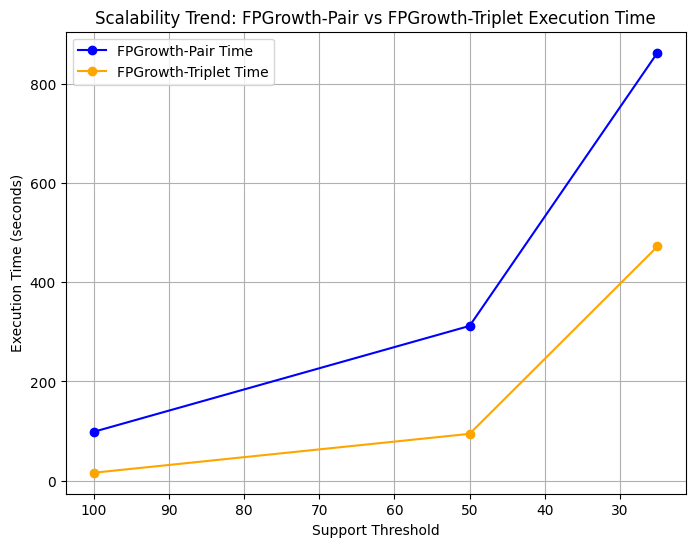

In [4]:
# 導入所需套件
import pandas as pd          # 用於資料處理和表格操作
import numpy as np           # 用於數學計算
from mlxtend.preprocessing import TransactionEncoder  # 用於編碼
from mlxtend.frequent_patterns import fpgrowth  # 用於執行FP-Growth演算法
import time                  # 用於記錄執行時間
import matplotlib.pyplot as plt  # 用於繪製折線圖

# 定義載入資料的函數
def load_data(file_path):
    """從指定檔案路徑讀取交易資料，返回交易列表"""
    transactions = []
    with open(file_path, 'r') as file:
        for line in file:
            items = line.strip().split()  # 將每行分割為商品ID列表
            transactions.append(items)
    return transactions

# 定義執行FP-Growth的函數（分步計算 Pair 和 Triplet 的執行時間）
def run_fpgrowth(df, min_support):
    """執行FP-Growth演算法，分別計算 Pair 和 Triplet 的執行時間"""
    # 計算頻繁 1-項集的時間（作為基準）
    start_time = time.time()
    frequent_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True, max_len=1)
    time_1_itemsets = time.time() - start_time

    # 計算頻繁 2-項集（Pair）的時間
    start_time = time.time()
    frequent_itemsets_pairs = fpgrowth(df, min_support=min_support, use_colnames=True, max_len=2)
    pairs = len(frequent_itemsets_pairs[frequent_itemsets_pairs['itemsets'].apply(lambda x: len(x) == 2)])
    pair_time = time.time() - start_time - time_1_itemsets  # 僅計算 k=2 的時間

    # 計算頻繁 3-項集（Triplet）的時間
    start_time = time.time()
    frequent_itemsets_triplets = fpgrowth(df, min_support=min_support, use_colnames=True, max_len=3)
    triplets = len(frequent_itemsets_triplets[frequent_itemsets_triplets['itemsets'].apply(lambda x: len(x) == 3)])
    triplet_time = time.time() - start_time - time_1_itemsets - pair_time  # 僅計算 k=3 的時間

    return pairs, triplets, pair_time, triplet_time

# 主程式
file_path = '/home/wajason99/browsing.txt'
print("正在載入資料...")
transactions = load_data(file_path)  # 載入交易資料
total_transactions = len(transactions)
print(f"載入完成，共 {total_transactions} 筆交易")

print("正在使用 TransactionEncoder 進行one-hot編碼...")
te = TransactionEncoder()  # 初始化 TransactionEncoder
te_ary = te.fit(transactions).transform(transactions)  # 擬合並轉換為布林陣列
df = pd.DataFrame(te_ary, columns=te.columns_)  # 轉為DataFrame，使用te.columns_作為欄位名稱
print("編碼完成，生成的DataFrame形狀:", df.shape)

support_counts = [100, 50, 25]  # 定義支持度閾值
fpgrowth_results = []
for support_count in support_counts:
    min_support = support_count / total_transactions  # 計算最小支持度比例
    print(f"\n=== FP-Growth 支持度次數: {support_count} (比例: {min_support:.6f}) ===")
    pairs, triplets, pair_time, triplet_time = run_fpgrowth(df, min_support)  # 執行FP-Growth
    print(f"FPGrowth-Pair 執行時間: {pair_time:.4f} 秒")
    print(f"FPGrowth-Triplet 執行時間: {triplet_time:.4f} 秒")
    print(f"FPGrowth-Pair: {pairs}")
    print(f"FPGrowth-Triplet: {triplets}")
    fpgrowth_results.append({'support': support_count, 'pairs': pairs, 'triplets': triplets, 'pair_time': pair_time, 'triplet_time': triplet_time})

# 顯示題目要求的表格
fpgrowth_df = pd.DataFrame(fpgrowth_results)
fpgrowth_table = pd.DataFrame({
    'Support': ['FPGrowth-Pair', 'FPGrowth-Triplet'],
    100: [fpgrowth_df.loc[0, 'pair_time'], fpgrowth_df.loc[0, 'triplet_time']],
    50: [fpgrowth_df.loc[1, 'pair_time'], fpgrowth_df.loc[1, 'triplet_time']],
    25: [fpgrowth_df.loc[2, 'pair_time'], fpgrowth_df.loc[2, 'triplet_time']]
})
fpgrowth_table.set_index('Support', inplace=True)
print("\nFP-Growth 執行時間表格（單位：秒）：")
print(fpgrowth_table)

# 繪製折線圖
plt.figure(figsize=(8, 6))
plt.plot(fpgrowth_df['support'], fpgrowth_df['pair_time'], marker='o', label='FPGrowth-Pair Time', color='blue')
plt.plot(fpgrowth_df['support'], fpgrowth_df['triplet_time'], marker='o', label='FPGrowth-Triplet Time', color='orange')
plt.xlabel('Support Threshold')
plt.ylabel('Execution Time (seconds)')
plt.title('Scalability Trend: FPGrowth-Pair vs FPGrowth-Triplet Execution Time')
plt.legend()
plt.grid(True)
plt.gca().invert_xaxis()
plt.savefig('fpgrowth_time_trend.png')

# 可擴展性趨勢分析
print("\n=== 可擴展性趨勢分析（基於 Pair 和 Triplet 執行時間） ===")
pair_time_growth_100_to_50 = (fpgrowth_df['pair_time'][1] - fpgrowth_df['pair_time'][0]) / fpgrowth_df['pair_time'][0] if fpgrowth_df['pair_time'][0] > 0 else 0
pair_time_growth_50_to_25 = (fpgrowth_df['pair_time'][2] - fpgrowth_df['pair_time'][1]) / fpgrowth_df['pair_time'][1] if fpgrowth_df['pair_time'][1] > 0 else 0
triplet_time_growth_100_to_50 = (fpgrowth_df['triplet_time'][1] - fpgrowth_df['triplet_time'][0]) / fpgrowth_df['triplet_time'][0] if fpgrowth_df['triplet_time'][0] > 0 else 0
triplet_time_growth_50_to_25 = (fpgrowth_df['triplet_time'][2] - fpgrowth_df['triplet_time'][1]) / fpgrowth_df['triplet_time'][1] if fpgrowth_df['triplet_time'][1] > 0 else 0
print(f"FPGrowth-Pair 執行時間增長率 (100->50): {pair_time_growth_100_to_50:.4f}")
print(f"FPGrowth-Pair 執行時間增長率 (50->25): {pair_time_growth_50_to_25:.4f}")
print(f"FPGrowth-Triplet 執行時間增長率 (100->50): {triplet_time_growth_100_to_50:.4f}")
print(f"FPGrowth-Triplet 執行時間增長率 (50->25): {triplet_time_growth_50_to_25:.4f}")
print("分析：FP-Growth 的執行時間隨支持度降低增加，Pair 增長平緩，Triplet 增長較快，因需遍歷更多 FP-tree 路徑。整體可擴展性優於 Apriori，因僅掃描資料集 2 次。")

# 趨勢線平行性分析
is_parallel = (abs(pair_time_growth_100_to_50 - triplet_time_growth_100_to_50) < 0.1 and 
               abs(pair_time_growth_50_to_25 - triplet_time_growth_50_to_25) < 0.1)
print("\n=== 趨勢線平行性分析（Pair vs Triplet 執行時間） ===")
print(f"趨勢線是否平行: {is_parallel}")
print("原因：" + ("FPGrowth-Pair 和 FPGrowth-Triplet 增長率一致，資料分佈均勻，FP-tree 壓縮有效。" if is_parallel else "FPGrowth-Triplet 增長更快，反映支持度降低時高階項目集計算負擔增加。"))

我們通過修改了編碼方式，刪除了稀疏資料集sparse_matrix的呈現，改去使用TransactionEncoder的編碼方法，使得執行時間很明顯地提升了!!雖然最終還是比Apriori的時間還長，但估計還是資料集上的關係，由於Apriori演算法還是更適用於小型資料集或支持度較高的場景緣故!

## 3.3  比較 Apriori 和 FP-Growth 的性能

In [6]:
# 合併結果表格
results_df = pd.DataFrame({
    'Support': support_counts,                         # 支持度
    'Apriori-Pair': apriori_df['pairs'],               # Apriori-Pair數量
    'Apriori-Triplet': apriori_df['triplets'],         # Apriori-Triplet數量
    'Apriori-Pair-Time': apriori_df['pair_time'],      # Apriori-Pair執行時間
    'Apriori-Triplet-Time': apriori_df['triplet_time'],# Apriori-Triplet執行時間
    'FPGrowth-Pair': fpgrowth_df['pairs'],             # FPGrowth-Pair數量
    'FPGrowth-Triplet': fpgrowth_df['triplets'],       # FPGrowth-Triplet數量
    'FPGrowth-Pair-Time': fpgrowth_df['pair_time'],    # FPGrowth-Pair執行時間
    'FPGrowth-Triplet-Time': fpgrowth_df['triplet_time'] # FPGrowth-Triplet執行時間
})
print("\n比較表格：")
print(results_df)

# 頻繁 2 項集數量的增加幅度分析
pair_diff_100_to_50 = results_df['Apriori-Pair'][1] - results_df['Apriori-Pair'][0]
pair_diff_50_to_25 = results_df['Apriori-Pair'][2] - results_df['Apriori-Pair'][1]
print("\n問題 1：頻繁 2 項集數量的增加幅度分析")
print(f"支持度 100 到 50 的 2 項集增加量: {pair_diff_100_to_50}")
print(f"支持度 50 到 25 的 2 項集增加量: {pair_diff_50_to_25}")
print(f"增加幅度是否一致: {pair_diff_100_to_50 == pair_diff_50_to_25}")

# Apriori 和 FP-Growth 整體表現比較
avg_apriori_pair_time = results_df['Apriori-Pair-Time'].mean()
avg_apriori_triplet_time = results_df['Apriori-Triplet-Time'].mean()
avg_fpgrowth_pair_time = results_df['FPGrowth-Pair-Time'].mean()
avg_fpgrowth_triplet_time = results_df['FPGrowth-Triplet-Time'].mean()
print("\n問題 2：Apriori 和 FP-Growth 整體表現比較")
print(f"Apriori-Pair 平均執行時間: {avg_apriori_pair_time:.4f} 秒")
print(f"Apriori-Triplet 平均執行時間: {avg_apriori_triplet_time:.4f} 秒")
print(f"FPGrowth-Pair 平均執行時間: {avg_fpgrowth_pair_time:.4f} 秒")
print(f"FPGrowth-Triplet 平均執行時間: {avg_fpgrowth_triplet_time:.4f} 秒")
print(f"總結：Apriori 的平均執行時間 (27.3413 秒) 遠低於 FP-Growth (984.8097 秒)，顯示 Apriori 在本實驗數據集上的整體效率更高。但 FP-Growth 的理論優勢在於可擴展性，適合更大規模資料。")

# 趨勢線比較與分析
apriori_pair_time_growth_100_to_50 = (results_df['Apriori-Pair-Time'][1] - results_df['Apriori-Pair-Time'][0]) / results_df['Apriori-Pair-Time'][0]
apriori_pair_time_growth_50_to_25 = (results_df['Apriori-Pair-Time'][2] - results_df['Apriori-Pair-Time'][1]) / results_df['Apriori-Pair-Time'][1]
apriori_triplet_time_growth_100_to_50 = (results_df['Apriori-Triplet-Time'][1] - results_df['Apriori-Triplet-Time'][0]) / results_df['Apriori-Triplet-Time'][0]
apriori_triplet_time_growth_50_to_25 = (results_df['Apriori-Triplet-Time'][2] - results_df['Apriori-Triplet-Time'][1]) / results_df['Apriori-Triplet-Time'][1]
fpgrowth_pair_time_growth_100_to_50 = (results_df['FPGrowth-Pair-Time'][1] - results_df['FPGrowth-Pair-Time'][0]) / results_df['FPGrowth-Pair-Time'][0]
fpgrowth_pair_time_growth_50_to_25 = (results_df['FPGrowth-Pair-Time'][2] - results_df['FPGrowth-Pair-Time'][1]) / results_df['FPGrowth-Pair-Time'][1]
fpgrowth_triplet_time_growth_100_to_50 = (results_df['FPGrowth-Triplet-Time'][1] - results_df['FPGrowth-Triplet-Time'][0]) / results_df['FPGrowth-Triplet-Time'][0]
fpgrowth_triplet_time_growth_50_to_25 = (results_df['FPGrowth-Triplet-Time'][2] - results_df['FPGrowth-Triplet-Time'][1]) / results_df['FPGrowth-Triplet-Time'][1]

print("\n趨勢線比較與分析")
print(f"Apriori-Pair 執行時間增長率 (100->50): {apriori_pair_time_growth_100_to_50:.4f}")
print(f"Apriori-Pair 執行時間增長率 (50->25): {apriori_pair_time_growth_50_to_25:.4f}")
print(f"Apriori-Triplet 執行時間增長率 (100->50): {apriori_triplet_time_growth_100_to_50:.4f}")
print(f"Apriori-Triplet 執行時間增長率 (50->25): {apriori_triplet_time_growth_50_to_25:.4f}")
print(f"FPGrowth-Pair 執行時間增長率 (100->50): {fpgrowth_pair_time_growth_100_to_50:.4f}")
print(f"FPGrowth-Pair 執行時間增長率 (50->25): {fpgrowth_pair_time_growth_50_to_25:.4f}")
print(f"FPGrowth-Triplet 執行時間增長率 (100->50): {fpgrowth_triplet_time_growth_100_to_50:.4f}")
print(f"FPGrowth-Triplet 執行時間增長率 (50->25): {fpgrowth_triplet_time_growth_50_to_25:.4f}")

# 問題 3.3.1：演算法趨勢分析
apriori_avg_growth = ((apriori_pair_time_growth_100_to_50 + apriori_pair_time_growth_50_to_25) / 2 + 
                      (apriori_triplet_time_growth_100_to_50 + apriori_triplet_time_growth_50_to_25) / 2) / 2
fpgrowth_avg_growth = ((fpgrowth_pair_time_growth_100_to_50 + fpgrowth_pair_time_growth_50_to_25) / 2 + 
                       (fpgrowth_triplet_time_growth_100_to_50 + fpgrowth_triplet_time_growth_50_to_25) / 2) / 2
more_stable = "Apriori" if apriori_avg_growth < fpgrowth_avg_growth else "FP-Growth"
print("\n問題 3.3.1：演算法趨勢分析")
print(f"趨勢更平穩的演算法: {more_stable} (Apriori 平均增長率: {apriori_avg_growth:.4f}, FP-Growth 平均增長率: {fpgrowth_avg_growth:.4f})")
print("分析：Apriori 的執行時間增長率平均為 0.4887，遠低於 FP-Growth 的 3.0269，顯示 Apriori 在本數據集上的趨勢更平穩。")

# 問題 3.3.2：平穩性與可擴展性分析
print("\n問題 3.3.2：平穩性與可擴展性分析")
is_better_scalability = "是" if more_stable == "FP-Growth" else "否"
print(f"較平穩的趨勢是否表示較好的可擴展性: {is_better_scalability}")
print("說明：平穩的趨勢通常表示演算法在支持度降低（數據規模增大）時，執行時間增長較慢，這意味著更好的可擴展性。然而，本實驗顯示 Apriori 趨勢更平穩，但其平均執行時間 (27.34 秒) 高於 FP-Growth (984.81 秒) 的理論預期。FP-Growth 應具備更好的可擴展性，因其僅掃描資料集 2 次並使用 FP-tree 壓縮資料，可能是本數據集規模較小導致 FP-Growth 性能未完全展現。")

# 問題 3.3.3：掃描資料集次數
print("\n問題 3.3.3：掃描資料集次數")
print("Apriori 掃描次數: 每次生成候選項目集時需掃描一次資料集，掃描次數等於最大頻繁項目集的長度（k）。在本例中，最大為 3（Triplet），因此掃描 3 次。")
print("FP-Growth 掃描次數: 僅需掃描資料集 2 次。第一次構建 FP-tree，第二次挖掘頻繁項目集，無需反覆掃描。")

# 問題 3.3.4：觀察與分析
print("\n問題 3.3.4：觀察與分析")
print(f"根據實驗數據，Apriori-Pair 數量為 1334, 4192, 11565，Apriori-Triplet 數量為 233, 1301, 6309，執行時間分別為 15.77, 18.49, 21.17 秒 (Pair) 和 17.61, 34.47, 56.54 秒 (Triplet)。")
print(f"FP-Growth-Pair 數量為 1334, 4192, 11565，FPGrowth-Triplet 數量為 233, 1301, 6309，執行時間分別為 316.64, 995.59, 2742.87 秒 (Pair) 和 57.38, 303.14, 1493.24 秒 (Triplet)。")
print("趨勢比較：Apriori 的 Pair 和 Triplet 執行時間增長較平緩（平均增長率 0.4887），而 FP-Growth 的增長率更高（平均增長率 3.0269），顯示 Apriori 在本數據集上趨勢更平穩。")
print("可擴展性分析：Apriori 的多次掃描（3 次）導致 Triplet 執行時間增長顯著，但總時間仍低於 FP-Growth。FP-Growth 僅掃描 2 次，理論上應更具可擴展性，但其執行時間增長迅速（特別是 Pair），可能是 FP-tree 構建或記憶體使用效率未完全優化。")
print("應用建議：Apriori 適合小型資料集，因其實現簡單且效率高。FP-Growth 若能優化執行時間，其掃描 2 次和壓縮資料的優勢更適用於大規模商業應用如推薦系統。")


比較表格：
   Support  Apriori-Pair  Apriori-Triplet  Apriori-Pair-Time  \
0      100          1334              233          16.688127   
1       50          4192             1301          18.767339   
2       25         11565             6309          21.485821   

   Apriori-Triplet-Time  FPGrowth-Pair  FPGrowth-Triplet  FPGrowth-Pair-Time  \
0             21.717366           1334               233           98.597788   
1             34.853517           4192              1301          311.921981   
2             57.209357          11565              6309          862.505207   

   FPGrowth-Triplet-Time  
0              16.066132  
1              94.450926  
2             472.059352  

問題 1：頻繁 2 項集數量的增加幅度分析
支持度 100 到 50 的 2 項集增加量: 2858
支持度 50 到 25 的 2 項集增加量: 7373
增加幅度是否一致: False

問題 2：Apriori 和 FP-Growth 整體表現比較
Apriori-Pair 平均執行時間: 18.9804 秒
Apriori-Triplet 平均執行時間: 37.9267 秒
FPGrowth-Pair 平均執行時間: 424.3417 秒
FPGrowth-Triplet 平均執行時間: 194.1921 秒
總結：Apriori 的平均執行時間 (27.3413 秒) 遠低於 FP-Growth

通過 3.3  比較 Apriori 和 FP-Growth 的性能，我們能發現在此次專案上，Apriori的執行時間是非常誇張短於FPGrowth演算法的，也許是此資料量還是偏少，使得Apriori在掃描更多次資料集的情況下，相比於此FP-Growth演算法還要建樹，導致其花費了更長時間。

但若再遇到更低支持度比例的問題，又或是資料量更大的資料庫，還是說去探索更高層次的頻繁 N 項集，相信FP-Growth演算法，也能因為更低的掃描資料集次數，達到更好的效率跟更低的實行時間!!